In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 4

In [3]:
x = np.random.randn(n)
y = np.random.randn(n)

In [4]:
x.shape

(4,)

In [5]:
x

array([-1.68018982, -1.5595366 , -0.48150358,  1.03465421])

## how to make A_ij = abs(x_i - x_j)

1. naive for loop

In [6]:
A = np.empty(shape=(n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = abs(x[i] - x[j])
A

array([[0.        , 0.12065322, 1.19868624, 2.71484403],
       [0.12065322, 0.        , 1.07803301, 2.59419081],
       [1.19868624, 1.07803301, 0.        , 1.51615779],
       [2.71484403, 2.59419081, 1.51615779, 0.        ]])

2. numpy ogrid

In [7]:
np.ogrid[:n, :n]

[array([[0],
        [1],
        [2],
        [3]]),
 array([[0, 1, 2, 3]])]

In [8]:
i, j = np.ogrid[:n, :n]
x_i, x_j = x[i], x[j]
x_i, x_j

(array([[-1.68018982],
        [-1.5595366 ],
        [-0.48150358],
        [ 1.03465421]]),
 array([[-1.68018982, -1.5595366 , -0.48150358,  1.03465421]]))

In [9]:
A = np.empty(shape=(n, n))
A = abs(x_i-x_j)
A

array([[0.        , 0.12065322, 1.19868624, 2.71484403],
       [0.12065322, 0.        , 1.07803301, 2.59419081],
       [1.19868624, 1.07803301, 0.        , 1.51615779],
       [2.71484403, 2.59419081, 1.51615779, 0.        ]])

3. numpy subtract.outer (numpy.ufunc.outer)

In [10]:
A = abs(np.subtract.outer(x, x))
A

array([[0.        , 0.12065322, 1.19868624, 2.71484403],
       [0.12065322, 0.        , 1.07803301, 2.59419081],
       [1.19868624, 1.07803301, 0.        , 1.51615779],
       [2.71484403, 2.59419081, 1.51615779, 0.        ]])

## how to make M = 1*1_T/n

In [11]:
M = np.dot(np.ones((n, 1)), np.ones((1, n)))/n
M

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [12]:
M = np.outer(np.ones(n), np.ones(n))/n
M

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [13]:
M = np.empty(shape=(n, n))
M.fill(1/n)
M

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [14]:
M = np.full(shape=(n, n), fill_value=1/n)
M

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

## calculate mat_tilda

In [15]:
A = abs(np.subtract.outer(x, x))
B = abs(np.subtract.outer(y, y))

In [16]:
I_minus_M = np.eye(n) - M
A_tilda = np.matmul(np.matmul(I_minus_M, A), I_minus_M)
B_tilda = np.matmul(np.matmul(I_minus_M, B), I_minus_M)

## calculate distance covariance

1

In [17]:
i, j = np.ogrid[:n, :n]
A_tilda_ij, B_tilda_ij = A_tilda[i,j], B_tilda[i,j]
A_tilda_ij, B_tilda_ij

(array([[-0.86427111, -0.68329127,  0.39474174,  1.15282064],
        [-0.68329127, -0.74361788,  0.33441513,  1.09249403],
        [ 0.39474174,  0.33441513, -0.74361788,  0.01446101],
        [ 1.15282064,  1.09249403,  0.01446101, -2.25977568]]),
 array([[-1.5930849 ,  0.02282299,  0.51669688,  1.05356503],
        [ 0.02282299, -0.51581297, -0.02193908,  0.51492907],
        [ 0.51669688, -0.02193908, -0.51581297,  0.02105518],
        [ 1.05356503,  0.51492907,  0.02105518, -1.58954928]]))

In [18]:
dcov_sq_xy = np.sum((A_tilda_ij * B_tilda_ij).flatten()) / (n**2)
dvar_sq_x = np.sum((A_tilda_ij * A_tilda_ij).flatten()) / (n**2)
dvar_sq_y = np.sum((B_tilda_ij * B_tilda_ij).flatten()) / (n**2)
dcov_sq_xy, dvar_sq_x, dvar_sq_y

(0.6033090023385379, 0.8421290158889974, 0.5552410809376014)

2

In [19]:
flat_A_tilda = A_tilda.flatten()
flat_B_tilda = B_tilda.flatten()

dcov_sq_xy = np.dot(flat_A_tilda, flat_B_tilda) / (n**2)
dvar_sq_x = np.dot(flat_A_tilda, flat_A_tilda) / (n**2)
dvar_sq_y = np.dot(flat_B_tilda, flat_B_tilda) / (n**2)
dcov_sq_xy, dvar_sq_x, dvar_sq_y

(0.6033090023385378, 0.8421290158889972, 0.5552410809376014)

## calculate distance correlation

In [20]:
dcor = np.sqrt( dcov_sq_xy / (np.sqrt(dvar_sq_x)*np.sqrt(dvar_sq_y)) )
dcor

0.9393011353157172

## Now, let's assemble

input: array(shape: (batch, 2)), output: distance correlation

In [21]:
def dcor(array):
    n = len(array)
    x = array[:, 0]
    y = array[:, 1]
    
    A = np.abs(np.subtract.outer(x, x))
    B = np.abs(np.subtract.outer(y, y))
    M = np.full(shape=(n, n), fill_value=1/n)
    
    I_minus_M = np.subtract(np.eye(n), M)
    A_tilda = np.matmul(np.matmul(I_minus_M, A), I_minus_M)
    B_tilda = np.matmul(np.matmul(I_minus_M, B), I_minus_M)
    
    # calculate covariance. omit n**2 division
    flat_A_tilda, flat_B_tilda = A_tilda.flatten(), B_tilda.flatten()
    dcov_sq_xy = np.dot(flat_A_tilda, flat_B_tilda)
    dvar_sq_x = np.dot(flat_A_tilda, flat_A_tilda)
    dvar_sq_y = np.dot(flat_B_tilda, flat_B_tilda)
    
    # calculate distance correlation
    dcor = np.sqrt( dcov_sq_xy / (np.sqrt(dvar_sq_x)*np.sqrt(dvar_sq_y)) )
    
    return np.round(dcor, 3)

## Test

Pearson's r

In [22]:
def cor(array):
    x = array[:, 0]
    y = array[:, 1]
    
    x_bar = x.mean()
    y_bar = y.mean()
    
    var_x = np.dot((x - x_bar), (x - x_bar))
    var_y = np.dot((y - y_bar), (y - y_bar))
    cov_xy = np.dot((x - x_bar), (y - y_bar))

    cor = cov_xy / (np.sqrt(var_x) * np.sqrt(var_y))
    
    return np.round(cor, 3)

samples

In [23]:
n = 1001
x = np.linspace(-1, 1, n)[:, np.newaxis]

a, b, exp1, exp2 = np.random.randint(1, 4), np.random.randint(1, 4), np.random.randint(1, 3), np.random.randint(1, 3)
y1 = ((-1)**exp1)*a*x + ((-1)**exp2)*b
y2 = ((-1)**exp1)*a*x + ((-1)**exp2)*b + np.random.randn(n)[:, np.newaxis]/np.e
y3 = x**2
y4 = x**3
y5 = x**4 - x**2
y8 = np.cos(2*np.pi*x)

# perfect linear
data1 = np.concatenate((x, y1), axis=1)

# noisy linear
data2 = np.concatenate((x, y2), axis=1)

# perfect quadratic
data3 = np.concatenate((x, y3), axis=1)

# perfect cubic
data4 = np.concatenate((x, y4), axis=1)

# quartic
data5 = np.concatenate((x, y5), axis=1)

# circle
theta = np.linspace(0, 2*np.pi*(1-1/(n-1)), n-1)[:, np.newaxis]
x6, y6 = 1 * np.cos(theta), 1 * np.sin(theta)
data6 = np.concatenate((x6, y6), axis=1)

# independent, standard normal distribution
x_ind = np.random.randn(n, 1)
y_ind = np.random.randn(n, 1)
data7 = np.concatenate((x_ind, y_ind), axis=1)

# cosine
data8 = np.concatenate((x, y8), axis=1)

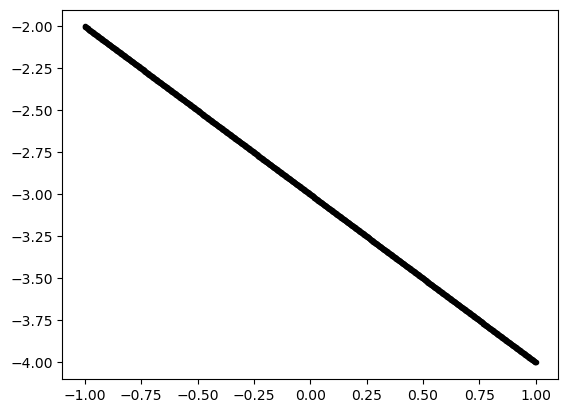

distance correlation: 1.0
Pearson correlation: -1.0


In [24]:
plt.scatter(x, y1, marker='.', c='black')
plt.show()
print(f"distance correlation: {dcor(data1)}")
print(f"Pearson correlation: {cor(data1)}")

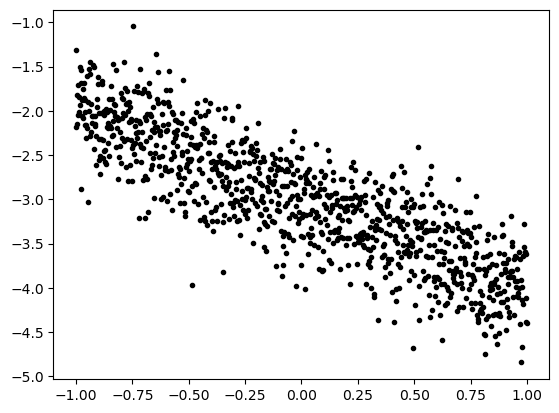

distance correlation: 0.831
Pearson correlation: -0.848


In [25]:
plt.scatter(x, y2, marker='.', c='black')
plt.show()
print(f"distance correlation: {dcor(data2)}")
print(f"Pearson correlation: {cor(data2)}")

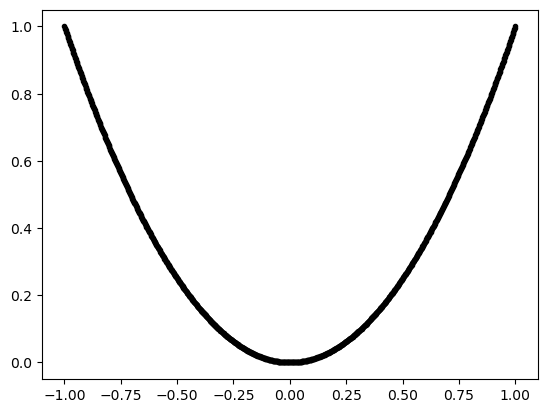

distance correlation: 0.491
Pearson correlation: 0.0


In [26]:
plt.scatter(x, y3, marker='.', c='black')
plt.show()
print(f"distance correlation: {dcor(data3)}")
print(f"Pearson correlation: {cor(data3)}")

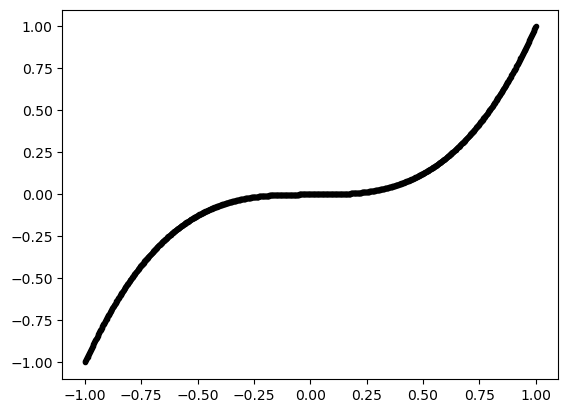

distance correlation: 0.919
Pearson correlation: 0.917


In [27]:
plt.scatter(x, y4, marker='.', c='black')
plt.show()
print(f"distance correlation: {dcor(data4)}")
print(f"Pearson correlation: {cor(data4)}")

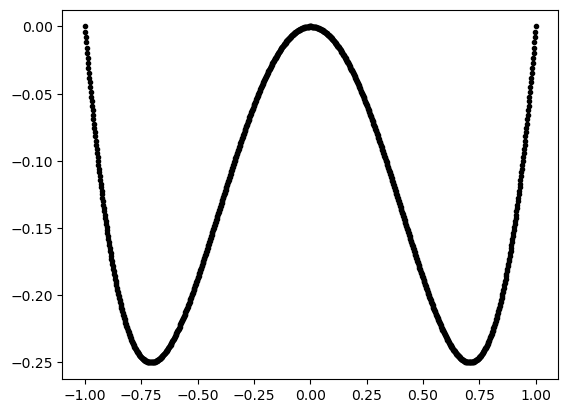

distance correlation: 0.38
Pearson correlation: 0.0


In [28]:
plt.scatter(x, y5, marker='.', c='black')
plt.show()
print(f"distance correlation: {dcor(data5)}")
print(f"Pearson correlation: {cor(data5)}")

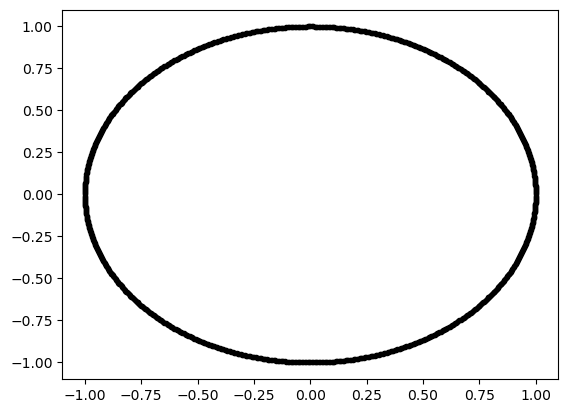

distance correlation: 0.197
Pearson correlation: -0.0


In [29]:
plt.scatter(x6, y6, marker='.', c='black')
plt.show()
print(f"distance correlation: {dcor(data6)}")
print(f"Pearson correlation: {cor(data6)}")

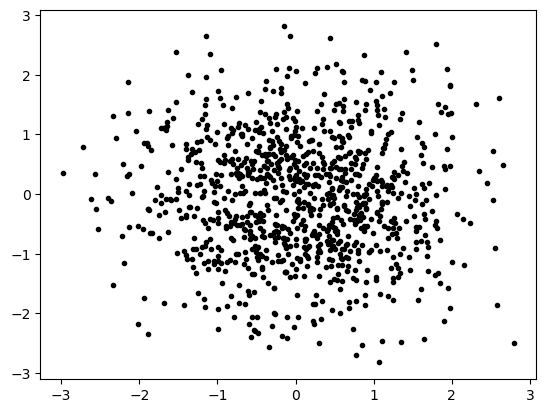

distance correlation: 0.055
Pearson correlation: -0.025


In [30]:
plt.scatter(x_ind, y_ind, marker='.', c='black')
plt.show()
print(f"distance correlation: {dcor(data7)}")
print(f"Pearson correlation: {cor(data7)}")

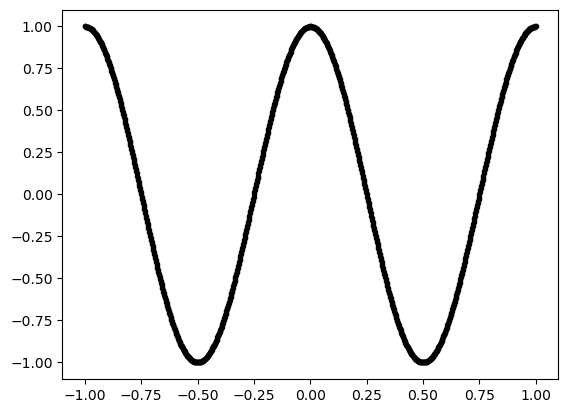

distance correlation: 0.249
Pearson correlation: 0.0


In [31]:
plt.scatter(x, y8, marker='.', c='black')
plt.show()
print(f"distance correlation: {dcor(data8)}")
print(f"Pearson correlation: {cor(data8)}")